# Customer Subscription Analysis
## Project 1: Data Cleaning and Exploratory Data Analysis (EDA)

**Author:** Mir Suhaib
**Dataset Source:** [Publicly Available Customer Subscription Dataset](https://www.kaggle.com/datasets/jayjoshi37/customer-subscription-churn-and-usage-patterns)
**Objective:**
The goal of this project is to clean a real-world customer subscription dataset and perform exploratory data analysis (EDA) to extract meaningful insights through five insightful visualizations.



## 📌 Project Overview

This project focuses on analyzing customer subscription behavior to understand user engagement, payment patterns, support interactions, and churn tendencies. The dataset includes information related to subscription plans, usage frequency, support tickets, payment failures, tenure, and login activity.

In [213]:
# Loading the dataset .
import pandas as pd
import numpy as np

df = pd.read_csv("K:/Data Science Internship/WEEK 2/Project_1/dataset/customer_subscription_churn_usage_patterns_with_missing.csv")
df.head()

,user_id,signup_date,plan_type,monthly_fee,avg_weekly_usage_hours,support_tickets,payment_failures,tenure_months,last_login_days_ago,churn
0,1,2023-04-15,Premium,699,1.1,4.0,1.0,8,14.0,Yes
1,2,2023-08-27,Premium,699,2.6,6.0,0.0,35,NaN,Yes
2,3,2023-10-12,Premium,699,14.3,8.0,3.0,2,14.0,Yes
3,4,2023-12-11,Basic,199,17.6,5.0,2.0,11,9.0,Yes
4,5,2023-02-14,NaN,199,9.8,5.0,2.0,6,NaN,Yes


In [214]:
df.columns


Index(['user_id', 'signup_date', 'plan_type', 'monthly_fee',
       'avg_weekly_usage_hours', 'support_tickets', 'payment_failures',
       'tenure_months', 'last_login_days_ago', 'churn'],
      dtype='object')

In [215]:
# Checking DataTypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 2800 non-null   int64  
 1   signup_date             2800 non-null   object 
 2   plan_type               2520 non-null   object 
 3   monthly_fee             2800 non-null   int64  
 4   avg_weekly_usage_hours  2520 non-null   float64
 5   support_tickets         2520 non-null   float64
 6   payment_failures        2520 non-null   float64
 7   tenure_months           2800 non-null   int64  
 8   last_login_days_ago     2520 non-null   float64
 9   churn                   2800 non-null   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 218.9+ KB


In [216]:
# Handling inconsistant datatype ie; converting date from object data type to datetime using pandas .
df["signup_date"]=pd.to_datetime(df["signup_date"])

In [217]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   user_id                 2800 non-null   int64         
 1   signup_date             2800 non-null   datetime64[ns]
 2   plan_type               2520 non-null   object        
 3   monthly_fee             2800 non-null   int64         
 4   avg_weekly_usage_hours  2520 non-null   float64       
 5   support_tickets         2520 non-null   float64       
 6   payment_failures        2520 non-null   float64       
 7   tenure_months           2800 non-null   int64         
 8   last_login_days_ago     2520 non-null   float64       
 9   churn                   2800 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(3), object(2)
memory usage: 218.9+ KB


In [218]:
# Detecting NULL or missing values and printing the sum of missing values in each collumn .
df.isnull().sum()

user_id                     0
signup_date                 0
plan_type                 280
monthly_fee                 0
avg_weekly_usage_hours    280
support_tickets           280
payment_failures          280
tenure_months               0
last_login_days_ago       280
churn                       0
dtype: int64

In [219]:
# Extracting rows with missing values .
rows_with_missing = df[df.isna().any(axis=1)]

print("Rows containing at least one missing value:\n")
print(rows_with_missing)


Rows containing at least one missing value:

      user_id signup_date plan_type  monthly_fee  avg_weekly_usage_hours  \
1           2  2023-08-27   Premium          699                     2.6   
4           5  2023-02-14       NaN          199                     9.8   
8           9  2023-03-15     Basic          199                     9.2   
11         12  2024-10-20  Standard          399                     2.1   
14         15  2024-09-02     Basic          199                    15.9   
...       ...         ...       ...          ...                     ...   
2787     2788  2024-09-24     Basic          199                     NaN   
2789     2790  2024-06-28   Premium          699                     NaN   
2791     2792  2024-07-29  Standard          399                     6.1   
2795     2796  2023-03-10       NaN          399                     6.7   
2799     2800  2024-03-21  Standard          399                     2.0   

      support_tickets  payment_failures  t

In [220]:
# Handling missing values in 'plan_type' and 'monthly_fee' using their
# one-to-one business relationship, where each subscription plan
# corresponds to a fixed monthly fee and vice versa.


fee_to_plan = {
    199: "Basic",
    399: "Standard",
    699: "Premium"
}

plan_to_fee = {
    "Basic": 199,
    "Standard": 399,
    "Premium": 699
}

df["plan_type"] = df["plan_type"].fillna(
    df["monthly_fee"].map(fee_to_plan)
)

df["monthly_fee"] = df["monthly_fee"].fillna(
    df["plan_type"].map(plan_to_fee)
)


In [221]:
print("Missing values after imputation:\n")
print(df[["plan_type", "monthly_fee"]].isna().sum())


Missing values after imputation:

plan_type      0
monthly_fee    0
dtype: int64


In [222]:
# Imputing missing values in numeric columns with their mean
# and in categorical column 'churn' with its mode.

numeric_cols = ["avg_weekly_usage_hours","support_tickets", "payment_failures", "tenure_months", "last_login_days_ago"]

for col in numeric_cols:
    mean_value = df[col].mean()
    df[col] = df[col].fillna(mean_value)
    print(f"{col}: missing values filled with mean = {mean_value:.0f}")


mode_value = df["churn"].mode()[0]
df["churn"] = df["churn"].fillna(mode_value)
print(f"\n'churn': missing values filled with mode = {mode_value}")

print("\nMissing values after imputation:\n")
print(df.isna().sum())


avg_weekly_usage_hours: missing values filled with mean = 13
support_tickets: missing values filled with mean = 4
payment_failures: missing values filled with mean = 3
tenure_months: missing values filled with mean = 19
last_login_days_ago: missing values filled with mean = 30

'churn': missing values filled with mode = Yes

Missing values after imputation:

user_id                   0
signup_date               0
plan_type                 0
monthly_fee               0
avg_weekly_usage_hours    0
support_tickets           0
payment_failures          0
tenure_months             0
last_login_days_ago       0
churn                     0
dtype: int64


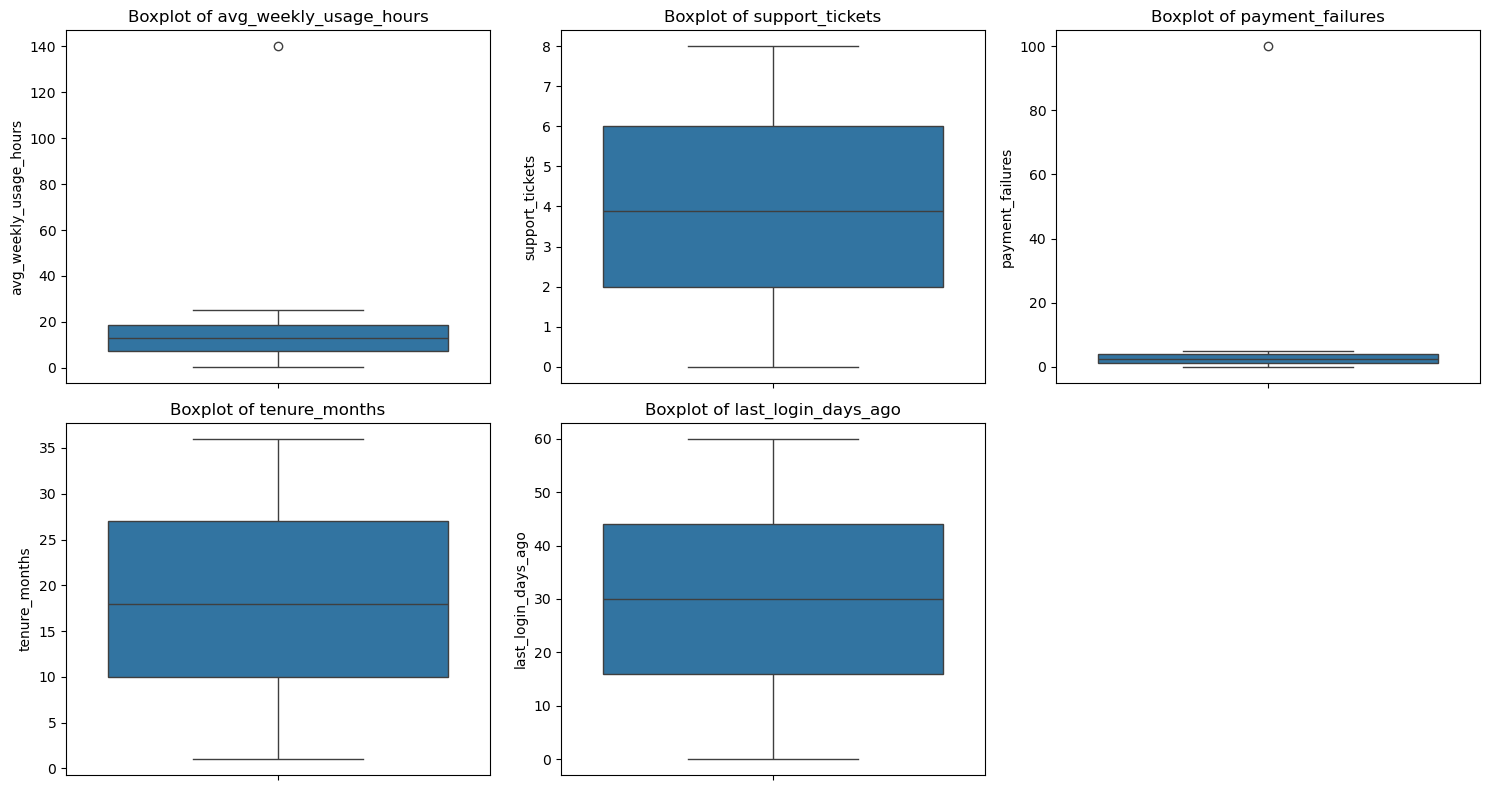

In [223]:
# Detecting outliers using box plot .
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


In [224]:
# Handling outliers using interquartile range .
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df[column] = df[column].clip(lower, upper)
    return df

for col in numeric_cols:
    df = cap_outliers_iqr(df, col)

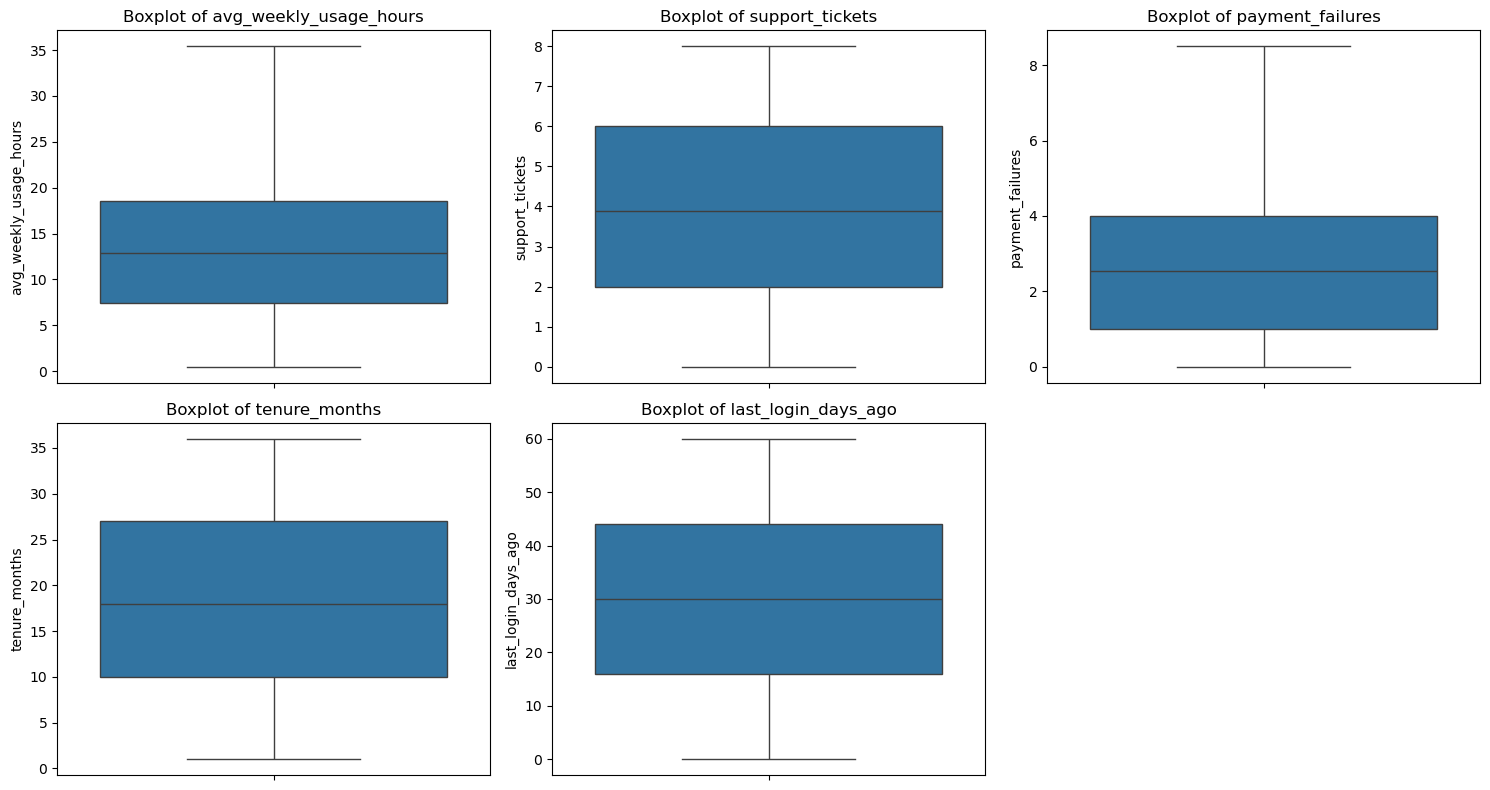

In [225]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

In [226]:
df.drop(columns=["Unnamed: 0"], errors="ignore", inplace=True)

# Set user_id as index
df.set_index("user_id", inplace=True)


In [227]:
# Saving the cleaned data set .
df.to_csv("dataset/Cleaned_customer_subscription_dataset.csv")